<a href="https://colab.research.google.com/github/scandy-dxd/FMMLProjects-and-labs/blob/main/5th_degree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.**Increase/decrease the learning rate to see how many iterations will be take to converge. Does it even converge on a huge learning rate?**
Ans:-  The learning rate is crucial as its value influences the convergence of the optimization algorithm.
With an increased learning rate, the algorithm may converge more quickly initially. However, if the learning rate is too large, it can lead to overshooting the minimum and cause the optimization process to diverge.
The loss curve may show rapid initial improvements, but there is a risk of instability and potential divergence.
A decreased learning rate will likely result in slower convergence. The algorithm will take smaller steps towards the minimum, and the optimization process may require more iterations to reach convergence.

3.**Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of x2 ?**

In [2]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)







In [16]:
def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a third degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b,c,d,e and f for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """





    a = coeffs[0] * (x*x*x*x*x)
    b = coeffs[1] * (x*x*x*x)
    c = coeffs[2] * (x*x*x)
    d = coeffs[3] * (x*x)
    e = coeffs[4] * (x)
    f = coeffs[4]
    y = a + b + c + d+ e + f
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1,0,0.5,0,0]

xs = []
ys = []
for x in hundred_xs:
    y = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)



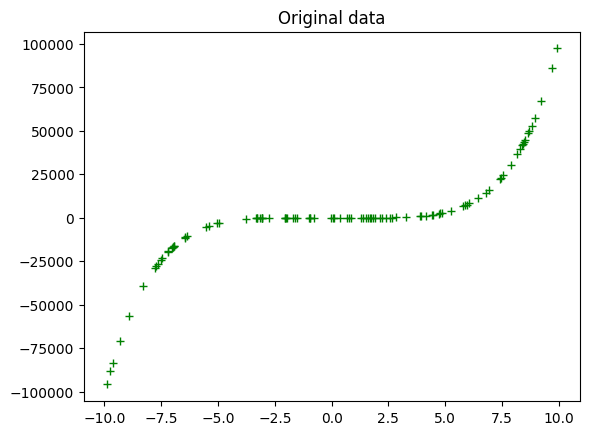

In [17]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [19]:
def eval_5th_degree_jitter(coeffs, x, j):

    a = coeffs[0] * (x*x*x*x*x)
    b = coeffs[1] * (x*x*x*x)
    c = coeffs[2] * (x*x*x)
    d = coeffs[3] * (x*x)
    e = coeffs[4] * (x)
    f = coeffs[4]
    y = a + b + c + d + e + f
    return y

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max

    while interval_min > jit_val:
           return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_5th_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)





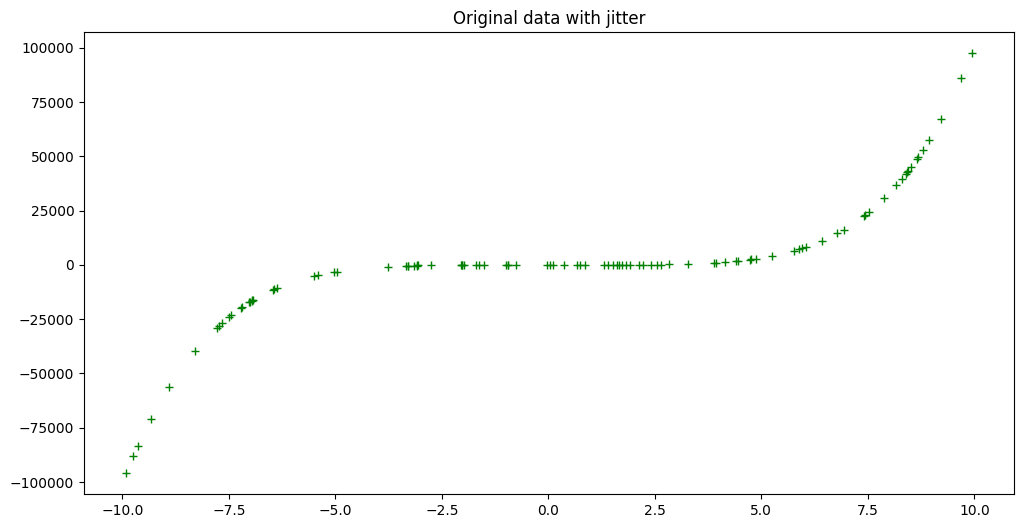

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [21]:

def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)


def eval_cubic(coeffs,x):
                 rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10),random.randrange(-10, 10),random.randrange(-10,10),random.randrange(-10,10))
                 y_bar =  eval_5th_degree(rand_coeffs, hundred_xs)
                 plt.figure(figsize=(12, 6))
                 plt.plot(xs, ys, 'g+', label = 'original')
                 plt.plot(xs, y_bar, 'ro', label = 'prediction')
                 plt.title('Original data vs first prediction')
                 plt.legend(loc="lower right")
                 plt.show()



In [ ]:
def calc_gradient_5th_poly(rand_coeffs, hundred_xs, ys):



    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []
    y_bars = eval_5th_degree(rand_coeffs, hundred_xs)

    y_bars = eval_cubic(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)

        partial_a =( x**5) * (y - y_bar)
        a_s.append(partial_a)
        partial_b = (x**4) * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (x**3) * (y - y_bar)
        c_s.append(partial_c)
        partial_d = (x**2)*(y - y_bar)
        d_s.append(partial_d)
        partial_e = x * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)
 return (gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f)


In [ ]:
calc_grad = calc_gradient_cubic(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]

new_model_coeffs = (a_new, b_new, c_new, d_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):


    a_s =[]
    b_s =[]
    c_s =[]
    d_s=[]
    e_s=[]
    f_s=[]
    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):
        x_5 = x ** 5
        x_4 = x ** 4
        x_cube = x ** 3
        partial_a = x_5 * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_4 * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_cube * (y - y_bar)
        c_s.append(partial_c)
        partial_d = (x**2)*(y - y_bar)
        d_s.append(partial_d)
        partial_e = x * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr *gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    e_new = coeffs[4]-  lr * gradient_e
    f_new = coeffs[5]-  lr * gradient_f
    new_model_coeffs = (a_new, b_new, c_new,d_new,e_new,f_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [ ]:
def gradient_descent(epochs, lr):

    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2],losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [ ]:
GD = gradient_descent(100000, 0.000000999)

[7562763.994185862, 2957929.4770860993, 1367775.2926185601, 783973.158174364, 541419.1688675536, 419049.9028836077, 342711.71917673765, 286957.51191107737, 242574.7816484762, 205835.4944284315, 174926.13512830593, 148752.84276269877, 126533.5832988659, 107652.31622691301, 91601.38488869462, 77954.46743669141, 66350.8249416863, 56484.302278291456, 48094.76677807087, 40961.08990780331, 34895.26593371634, 29737.439531120486, 25351.68716449663, 21622.433088320213, 18451.402882987994, 15755.033370377048, 13462.270363673102, 11512.696119485825, 9854.937112705768, 8445.310163062471, 7246.67123068576, 6227.436541299615, 5360.750243921944, 4623.77666583433, 3997.098513239662, 3464.2051580906445, 3011.057525663785, 2625.7181161533545, 2298.0364100677934, 2019.38136676762, 1782.4139665513549, 1580.8938019832503, 1409.5146214719769, 1263.76449110212, 1139.806889496855, 1034.379602148124, 944.7087507285968, 868.4356917590521, 803.5548581569543, 748.36090557516, 701.4037706529041, 661.4504568080141,

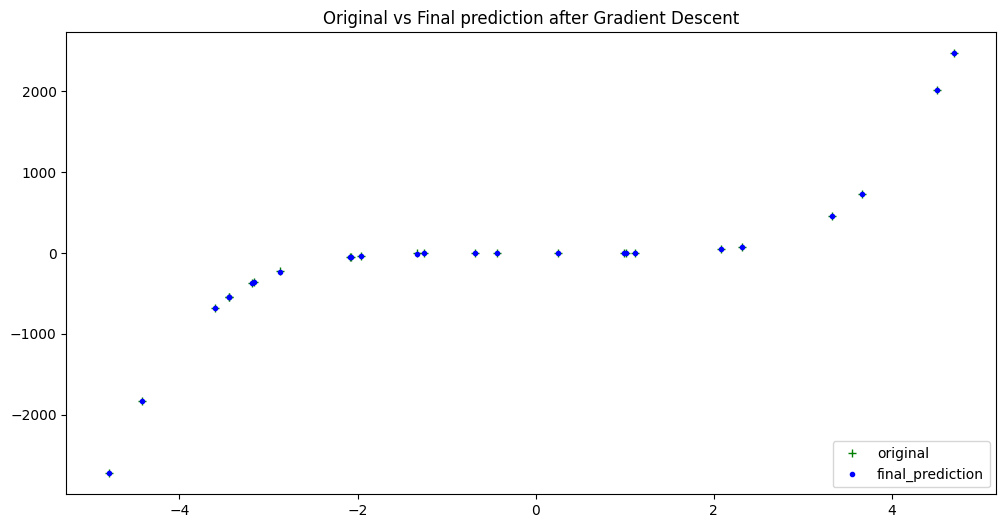

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (1.0213028263432906, 0.008690959458480975, 1.3611455303265974, -0.07549314344666423, -2.0292126971915327, -2.531341810138159)
Original Coefficients: [1, 0, 2, 0, -6, -1]


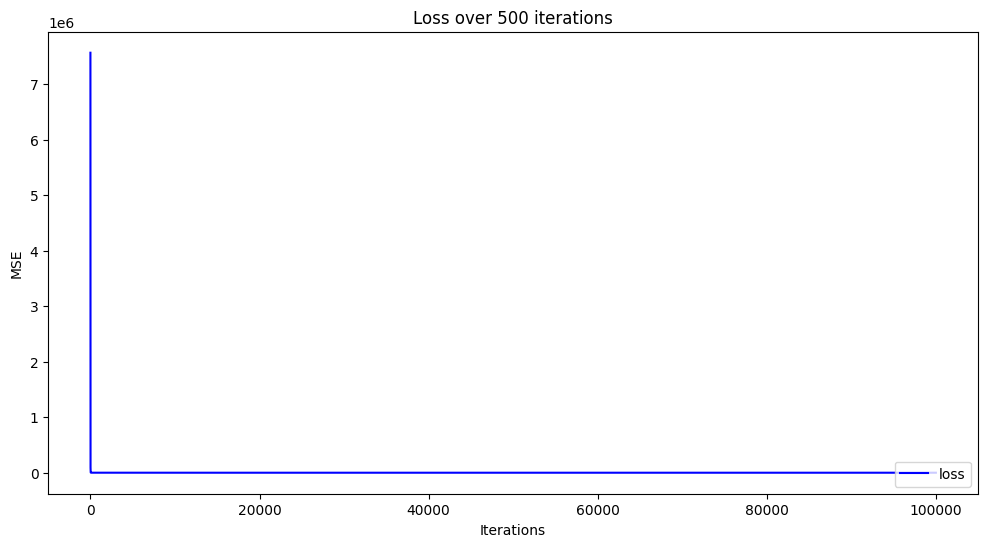

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()